In [ ]:
"""
Given features of temperature, humidity, and windspeed, determine if it is snowy, rainy, or sunny.
"""

# Answer Key Code

## Load Data (Provided To Students)

In [2]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from matplotlib.colors import ListedColormap

# Generate synthetic weather data
np.random.seed(42)

# Create synthetic features
n_samples = 300
temperature = np.random.normal(loc=15, scale=10, size=n_samples)  # Average temperature in Celsius
humidity = np.random.normal(loc=50, scale=20, size=n_samples)     # Humidity in percentage
wind_speed = np.random.normal(loc=10, scale=5, size=n_samples)    # Wind speed in km/h

# Assign labels based on synthetic rules
# Rainy: Low temperature and high humidity
# Sunny: High temperature and moderate humidity
# Snowy: Very low temperature
labels = []
for t, h, w in zip(temperature, humidity, wind_speed):
    if t < 5 and h > 60:
        labels.append(0)  # Snowy
    elif t > 20 and h < 60:
        labels.append(1)  # Sunny
    else:
        labels.append(2)  # Rainy

# Convert to NumPy arrays
labels = np.array(labels)
X = np.column_stack((temperature, humidity, wind_speed))
y = labels
target_names = ['Snowy', 'Sunny', 'Rainy']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

## Model Building + Visualization Code (Students generate on their own)

Classification Report:
              precision    recall  f1-score   support

       Snowy       1.00      0.50      0.67         4
       Sunny       0.69      0.55      0.61        20
       Rainy       0.85      0.92      0.88        66

    accuracy                           0.82        90
   macro avg       0.84      0.66      0.72        90
weighted avg       0.82      0.82      0.81        90



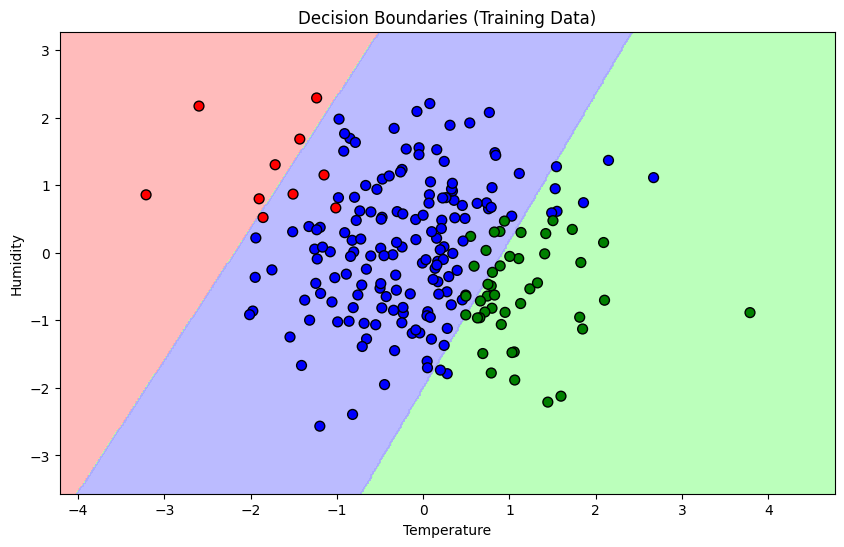

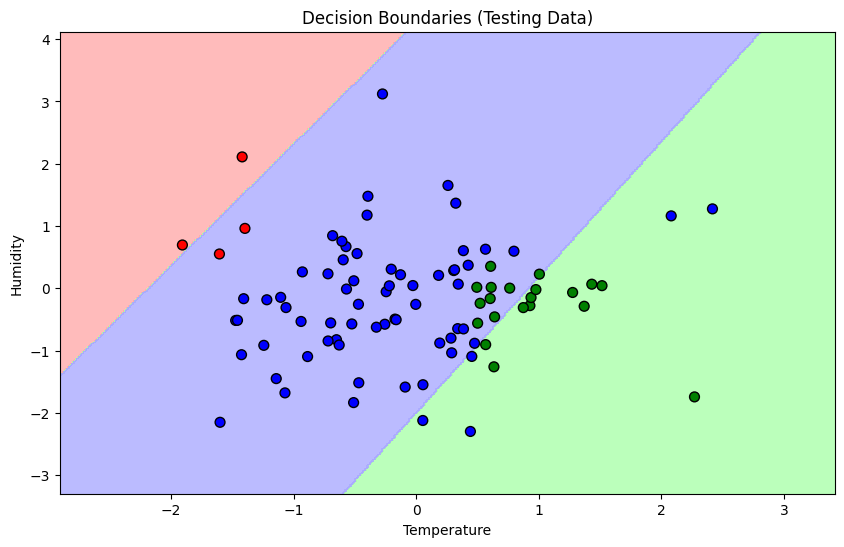

In [3]:
# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build a Support Vector Classifier
model = SVC(kernel='linear', C=1, decision_function_shape='ovr')
model.fit(X_train[:, :2], y_train)  # Use first two features for visualization

# Make predictions
y_pred = model.predict(X_test[:, :2])

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=target_names))

# Visualize the decision boundaries
def plot_decision_boundaries(X, y, model, title, feature_names):
    h = 0.02  # Mesh step size
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Predict for each point in the mesh
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot the decision boundary
    plt.figure(figsize=(10, 6))
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = ['r', 'g', 'b']
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=cmap_light)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', s=50, cmap=ListedColormap(cmap_bold))
    plt.title(title)
    plt.xlabel(feature_names[0])
    plt.ylabel(feature_names[1])
    plt.show()

# Plot decision boundaries for training and testing data
plot_decision_boundaries(X_train[:, :2], y_train, model, "Decision Boundaries (Training Data)", ['Temperature', 'Humidity'])
plot_decision_boundaries(X_test[:, :2], y_test, model, "Decision Boundaries (Testing Data)", ['Temperature', 'Humidity'])